In [84]:
#import Libraries

import os
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

In [2]:
#set working directory
os.chdir("/home/neha/home/Project_1/Python_Project1")

In [3]:
os.getcwd()

'/home/neha/home/Project_1/Python_Project1'

In [4]:
#Load train and test data
data_train = pd.read_csv("Train_data.csv")
data_test = pd.read_csv("Test_data.csv")

In [5]:
#Let's combine the data for preprocessing
churn_data = data_train.append(data_test)

In [6]:
churn_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [7]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 1666
Data columns (total 21 columns):
state                            5000 non-null object
account length                   5000 non-null int64
area code                        5000 non-null int64
phone number                     5000 non-null object
international plan               5000 non-null object
voice mail plan                  5000 non-null object
number vmail messages            5000 non-null int64
total day minutes                5000 non-null float64
total day calls                  5000 non-null int64
total day charge                 5000 non-null float64
total eve minutes                5000 non-null float64
total eve calls                  5000 non-null int64
total eve charge                 5000 non-null float64
total night minutes              5000 non-null float64
total night calls                5000 non-null int64
total night charge               5000 non-null float64
total intl minutes           

# Exploratory Aata Analysis

In [8]:
## Convert Data into required types
churn_data['area code'] = churn_data['area code'].astype(str)
churn_data['number customer service calls'] = churn_data['number customer service calls'].astype(str)

In [9]:
for i in range(0, len(churn_data.columns)):
    if(churn_data.iloc[:,i].dtypes == 'object'):
        churn_data.iloc[:,i] = pd.Categorical(churn_data.iloc[:,i])
        churn_data.iloc[:,i] = churn_data.iloc[:,i].cat.codes 
        churn_data.iloc[:,i] = churn_data.iloc[:,i].astype('object')

In [10]:
object_cnames = []
numeric_cnames = []
target_cnames = []
for i in range(0, len(churn_data.columns)):
    if(churn_data.iloc[:,i].dtypes == 'object' and churn_data.columns[i] != 'Churn'):
        object_cnames.append(churn_data.columns[i])
    elif(churn_data.iloc[:,i].dtypes == 'int64' or churn_data.iloc[:,i].dtypes == 'float64'):
        numeric_cnames.append(churn_data.columns[i])
    else:
        target_cnames.append(churn_data.columns[i])
        

In [ ]:
#Let's check if there is any missing value 
churn_data.isnull().sum()
#There is no missing value

In [ ]:
churn_data.info()

# Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff778c8c518>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff778c5a400>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff778c8c668>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff778c5ac50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff778c630b8>],
 'means': []}

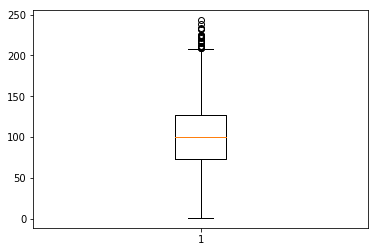

In [11]:
%matplotlib inline
plt.boxplot(churn_data['account length'])

In [12]:
#Detect and impute outliers with NA
for i in numeric_cnames:
     #print(i)
    q75, q25= np.percentile(churn_data.loc[:,i], [75 ,25])
    iqr = q75 - q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    #print(min)
    #print(max)
    
    churn_data.loc[churn_data[i] < min,:i] = np.nan
    churn_data.loc[churn_data[i] > max,:i] = np.nan

In [13]:
missing_val = pd.DataFrame(churn_data.isnull().sum())

In [14]:
#impute with KNN
churn_data = pd.DataFrame(KNN(k = 3).complete(churn_data), columns = churn_data.columns)

Imputing row 1/5000 with 0 missing, elapsed time: 9.307
Imputing row 101/5000 with 0 missing, elapsed time: 9.314
Imputing row 201/5000 with 0 missing, elapsed time: 9.323
Imputing row 301/5000 with 0 missing, elapsed time: 9.331
Imputing row 401/5000 with 0 missing, elapsed time: 9.344
Imputing row 501/5000 with 0 missing, elapsed time: 9.352
Imputing row 601/5000 with 0 missing, elapsed time: 9.363
Imputing row 701/5000 with 0 missing, elapsed time: 9.370
Imputing row 801/5000 with 0 missing, elapsed time: 9.375
Imputing row 901/5000 with 0 missing, elapsed time: 9.386
Imputing row 1001/5000 with 0 missing, elapsed time: 9.398
Imputing row 1101/5000 with 0 missing, elapsed time: 9.409
Imputing row 1201/5000 with 15 missing, elapsed time: 9.416
Imputing row 1301/5000 with 0 missing, elapsed time: 9.426
Imputing row 1401/5000 with 19 missing, elapsed time: 9.437
Imputing row 1501/5000 with 0 missing, elapsed time: 9.444
Imputing row 1601/5000 with 0 missing, elapsed time: 9.452
Imputin

# Feature Selection

In [15]:
df_corr = churn_data.loc[:, numeric_cnames]

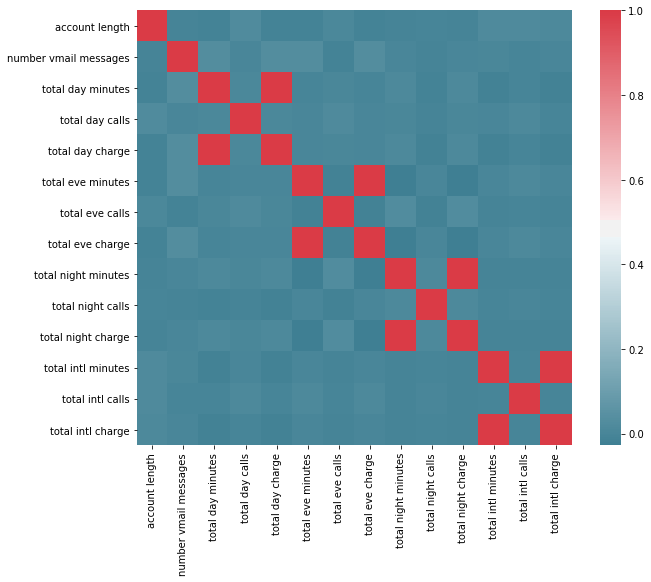

In [16]:
f, ax = plt.subplots(figsize=(10, 8))

corr = df_corr.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [17]:
for i in object_cnames:
      print(i)
      chi2, p, dof, ex = chi2_contingency(pd.crosstab(churn_data['Churn'], churn_data[i]))
      print(p)

state
1.8750313178393932e-11
area code
6.321099335461773e-09
phone number
0.27412502542444905
international plan
4.561292638431719e-50
voice mail plan
8.505930058473204e-16
number customer service calls
4.186291993492475e-101


In [18]:
churn_data = churn_data.drop(['total day charge', 'total eve charge', 'total night charge', 'total intl charge', 
                                'area code', 'phone number'], axis=1 )
#as area code is also of no use                              

In [19]:
numeric_cnames = ['account length','number vmail messages','total day minutes','total day calls','total eve minutes',
                  'total eve calls','total night minutes','total night calls','total intl minutes',
                  'total intl calls']

In [20]:
#Normalisation

for i in numeric_cnames:
    print(i)
    churn_data[i] = (churn_data[i] - np.min(churn_data[i]))/(np.max(churn_data[i]) - np.min(churn_data[i]))

account length
number vmail messages
total day minutes
total day calls
total eve minutes
total eve calls
total night minutes
total night calls
total intl minutes
total intl calls


# Model Development

In [21]:
#Replace tagret categories with yes or no
churn_data['Churn'] = churn_data['Churn'].replace(0, 'No')
churn_data['Churn'] = churn_data['Churn'].replace(1, 'Yes')

In [22]:
#Devide the data in train and test
X = churn_data.values[:,0:14]
Y = churn_data.values[:,14]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [23]:
#1.Decision Tree
DT_clf = tree.DecisionTreeClassifier(criterion = 'entropy').fit(X_train, Y_train)

In [24]:
Y_Predict = DT_clf.predict(X_test)

In [25]:
#Confusion Matrix
CM_DT = confusion_matrix(Y_test, Y_Predict)

In [26]:
CM_DT = pd.crosstab(Y_test, Y_Predict)

In [27]:
TN = CM_DT.iloc[0,0]
FN = CM_DT.iloc[1,0]
TP = CM_DT.iloc[1,1]
FP = CM_DT.iloc[0,1]

In [28]:
accuracy_score(Y_test, Y_Predict)*100

89.9

In [29]:
(FN*100)/(FN+TP)

35.61643835616438

In [30]:
#For Decision Tree
#Accuracy : 91.8
#FNR : 35.65

In [31]:
#2.Random Forest
RF_Model = RandomForestClassifier(n_estimators=500).fit(X_train, Y_train)

In [32]:
RF_Predictions = RF_Model.predict(X_test)

In [33]:
CM_RF = confusion_matrix(Y_test, Y_Predict)

In [34]:
CM_RF = pd.crosstab(Y_test, Y_Predict)

TN = CM_RF.iloc[0,0]
FN = CM_RF.iloc[1,0]
TP = CM_RF.iloc[1,1]
FP = CM_RF.iloc[0,1]

#Accuracy
#((TN+TP)*100)/(TN+FN+TP+FP)

#FNR
(FN*100)/(FN+TP)

35.61643835616438

In [89]:
#For Random Forest
#Accuracy : 91.8
#FNR :35.65

In [90]:
#3.KNN Implementation

KNN_Model = KNeighborsClassifier(n_neighbors = 9).fit(X_train, Y_train)

In [92]:
KNN_Predictions = KNN_Model.predict(X_test)

In [96]:
CM = pd.crosstab(Y_test, KNN_Predictions)

TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
#((TN+TP)*100)/(TN+FN+TP+FP)

#FNR
(FN*100)/(FN+TP)

92.46575342465754

In [97]:
#For KNN Implementation
#Accuracy : 85.2
#FNR : 92.46

In [98]:
#4.Naive Bayes

NB_Model = GaussianNB().fit(X_train, Y_train)

In [99]:
NB_Predictions = NB_Model.predict(X_test)

In [103]:
CM = pd.crosstab(Y_test, NB_Predictions)

TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#((TN+TP)*100)/(TN+FN+TP+FP)

#FNR
(FN*100)/(FN+TP)

#For Naive Bayes
#Accuracy : 85.1
#FNR : 63.69

63.6986301369863